In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

#imports
import numpy as np 
import matplotlib.pyplot as plt


#functions
def logistic(x):
   """use of logistic funiction"""
   return 1.0/(1.0 + np.exp(-x))
  
def tanhyperbolic(x):
    """use of tanhyperbolic function"""
    return np.tanh(x)

def error_reg(data,weight):
    """return original and predicted"""
    temp_error = []
    for i in range(data.shape[0]):
        temp = np.dot(data[i,:-1],weight)
        temp_error.append(temp)
    return np.array(temp_error)

def datadivide(Class):
    """divide the data into test,train,valid"""
    np.random.shuffle(Class)
    train = Class[:int(0.6*Class.shape[0])]
    test  = Class[int(0.6*Class.shape[0]):]
    return train,test

def predict_logistic(data,weight1,weight2,weight3):
    a = np.dot(data,weight1)
    if logistic(a)>0.5:
        a = 1
    else:
        a = 0
    b = np.dot(data,weight2)
    if logistic(b)>0.5:
        b = 1
    else:
        b = 0
    c = np.dot(data,weight3)
    if logistic(c)>0.5:
        c = 1
    else:
        c = 0
    final = np.argmax(np.array([a,b,c]))
    return final

def predict_tan(data,weight1,weight2,weight3):
    a = np.dot(data,weight1)
    if tanhyperbolic(a)>0:
        a = 1
    else:
        a = 0
    b = np.dot(data,weight2)
    if tanhyperbolic(b)>0:
        b = 1
    else:
        b = 0
    c = np.dot(data,weight3)
    if tanhyperbolic(c)>0:
        c = 1
    else:
        c = 0
    final = np.argmax(np.array([a,b,c]))
    return final
     

def plot_decision_boundry(dataset,labels,weight1,weight2,weight3,method="Linear-logistic"):
    h = 0.04
    x_min, x_max = dataset[:,1].min() - 100*h, dataset[:,1].max() + 100*h
    y_min, y_max = dataset[:,2].min() - 100*h, dataset[:,2].max() + 100*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = np.c_[xx.ravel(), yy.ravel()]
    classify = np.zeros(Z.shape[0])
    if method =="Linear-logistic" or  method =="NonLinear-Logistic":
        for i in range(Z.shape[0]):
            t = np.append([1],Z[i])
            classify[i] = predict_logistic(t,weight1,weight2,weight3) 
    else:
       for i in range(Z.shape[0]):
           t = np.append([1],Z[i])
           classify[i] = predict_tan(t,weight1,weight2,weight3)
    Z = classify.reshape(xx.shape)
    plt.figure(figsize=(10,10))
    plt.contourf(xx, yy, Z,alpha=0.5,cmap='bwr')
    # add a legend, called a color bar
    plt.contour(xx, yy, Z, colors='black', linewidths=0.5)
    plt.scatter(dataset[:,1], dataset[:,2],c=labels,cmap='brg')
    plt.title(f'Decision_boundary-{method}') 
    plt.show()   


def perceptron(Class1,Class2,epoch,ita=0.01,method="logistic",):
    weight = np.random.rand(3)
    data = np.concatenate((Class1,Class2), axis=0)
    error = []
    for i in range(epoch):
        Sum = 0
        for j in range(data.shape[0]):
              a = np.dot(data[j,:-1],weight)
              if method=="logistic":
                  sigmoid = logistic(a)
                  E = 0.5*(data[j,-1]- sigmoid)**2     #error
                  delta = data[j,-1]-sigmoid         #delta
                  diff = sigmoid*(1-sigmoid)   #differntiation
                  weight_instant = ita*delta*diff*diff*data[j,:-1]
                  weight += weight_instant
              else:
                  fun = tanhyperbolic(a)
                  E = 0.5*(data[j,-1]-fun)**2
                  delta = data[j,-1]-fun        #delta
                  diff = (1-fun**2)             #differntiation
                  weight_instant = ita*delta*diff*data[j,:-1]
                  weight += weight_instant
              Sum += E
        error.append((0.5*Sum)/data.shape[0])

    return weight,np.array(error)

def perceptron_regression(data,dim,epoch,ita=0.01):
    weight = np.random.rand(dim)
    error = []
    MSE = []
    for i in range(epoch):
        Sum = 0
        Sum2 = 0
        for j in range(data.shape[0]):
            a = np.dot(data[j,:-1],weight)
            E = 0.5*(data[j,-1]- a)**2     #error
            MSE_e = (a-data[j,-1])**2 
            weight_instant = ita*(data[j,-1]- a)*data[j,:-1]
            weight += weight_instant
            Sum += E
            Sum2 +=MSE_e
        error.append((0.5*Sum)/data.shape[0])
        MSE.append(Sum2/data.shape[0])
    return weight,np.array(error),np.array(MSE)

def model(Class1,Class2,Class3,epoch,ita=0.1,method="logistic"):
        if method =="logistic":
            zero1 = np.zeros((Class1.shape[0],1),dtype=int)
            zero2 = np.zeros((Class2.shape[0],1),dtype=int)
            zero3 = np.zeros((Class3.shape[0],1),dtype=int)
        else :
            zero1 = np.zeros((Class1.shape[0],1),dtype=int)
            zero2 = np.zeros((Class2.shape[0],1),dtype=int)
            zero3 = np.zeros((Class3.shape[0],1),dtype=int)
            zero1 -= 1
            zero2 -= 1
            zero3 -= 1

        ones1 = np.ones((Class1.shape[0],1),dtype=int)
        ones2 = np.ones((Class2.shape[0],1),dtype=int)
        ones3 = np.ones((Class3.shape[0],1),dtype=int)
        data1 = np.append(Class1,ones1,axis=1)
        data2 = np.append(Class2,zero2,axis=1)
        data3 = np.append(Class3,zero3,axis=1)
        alldata = np.concatenate((data2,data3), axis=0)
        X1_weight,X1_Error = perceptron(data1,alldata,epoch,ita,method)
        data1 = np.append(Class2,ones2,axis=1)
        data2 = np.append(Class3,zero3,axis=1)
        data3 = np.append(Class1,zero1,axis=1)
        alldata = np.concatenate((data2,data3), axis=0)
        X2_weight,X2_Error = perceptron(data1,alldata,epoch,ita,method)
        data1 = np.append(Class3,ones3,axis=1)
        data2 = np.append(Class2,zero2,axis=1)
        data3 = np.append(Class1,zero1,axis=1)
        alldata = np.concatenate((data2,data3), axis=0)
        X3_weight,X3_Error = perceptron(data1,alldata,epoch,ita,method)
        return X1_weight,X2_weight,X3_weight,X1_Error,X2_Error,X3_Error
    



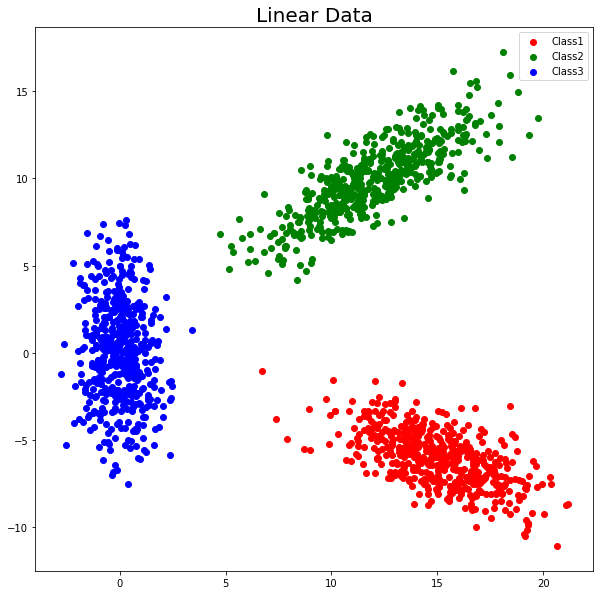

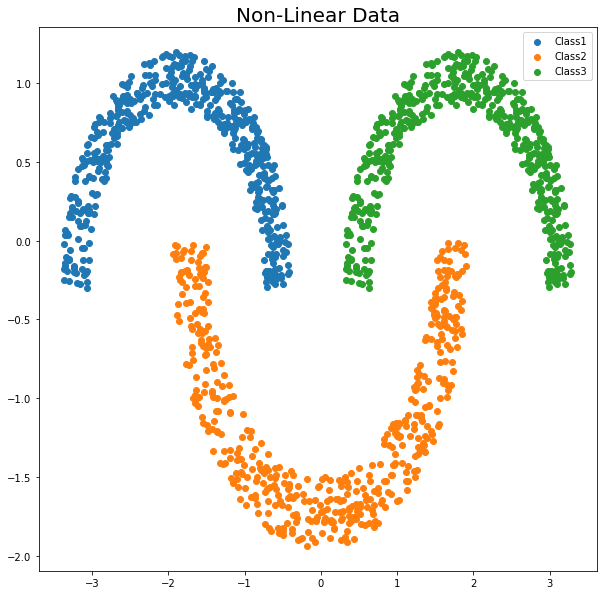


Linear - Logistic:

     	Class1	Class2	Class3
Class1	200		0		0
Class2	0		200		0
Class3	0		0		200
Accuracy-Logistic = 100.0%


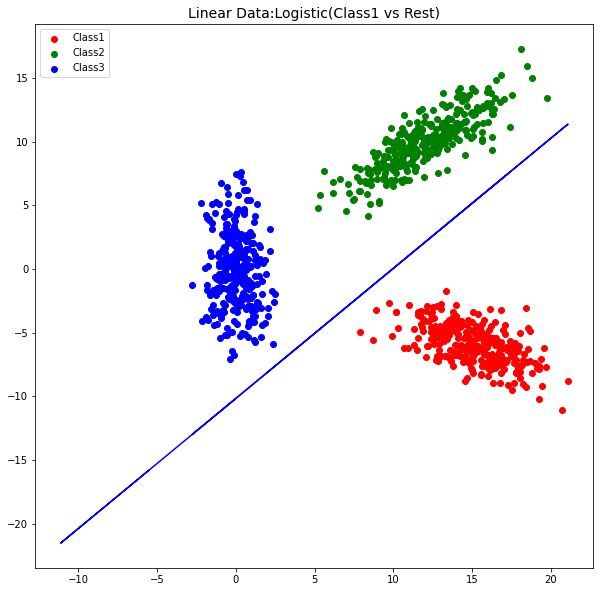

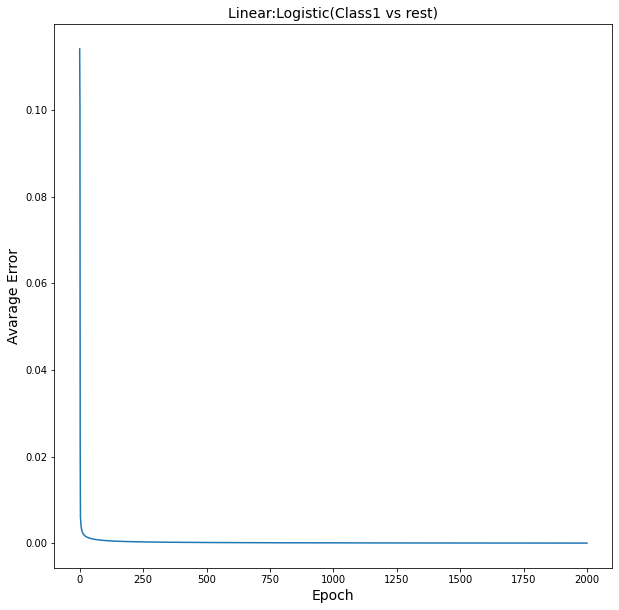

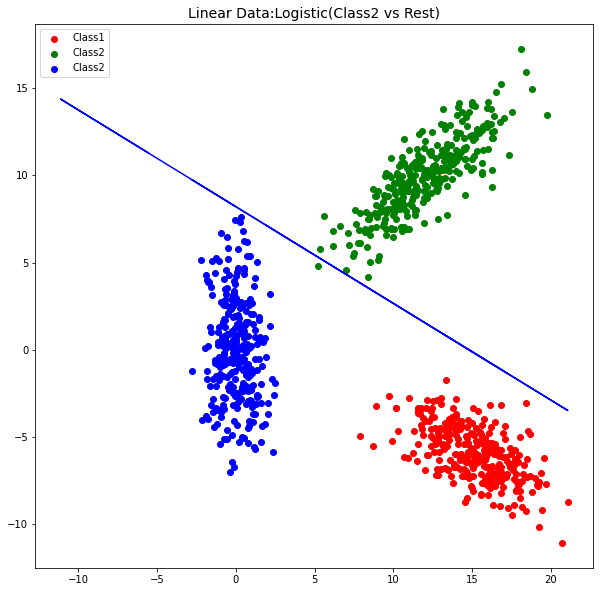

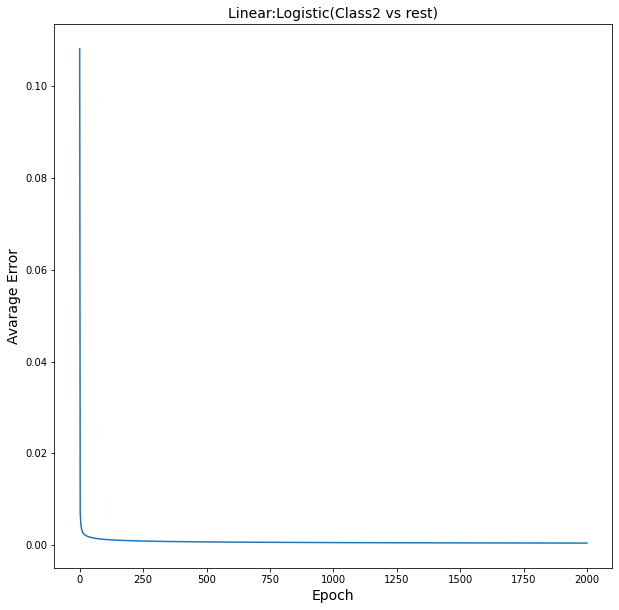

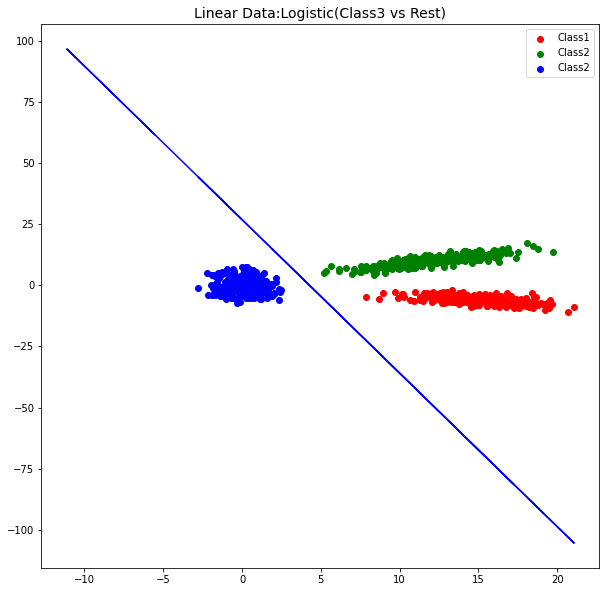

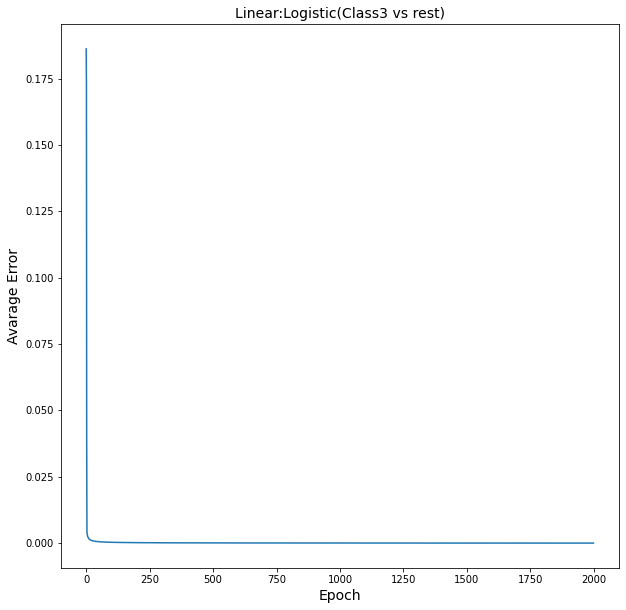

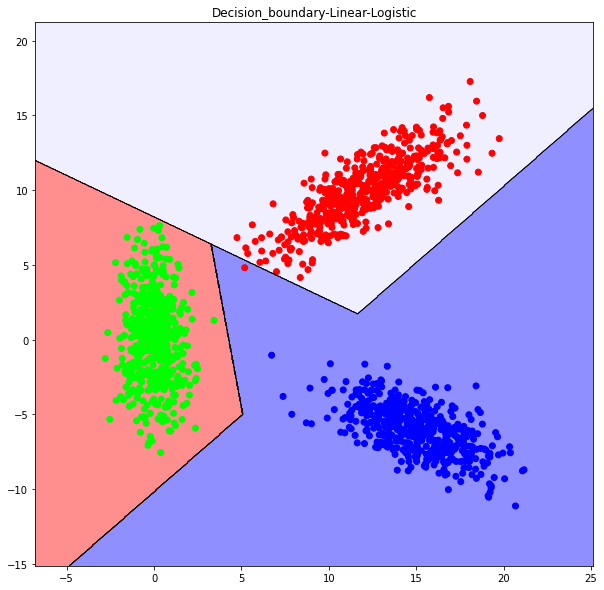

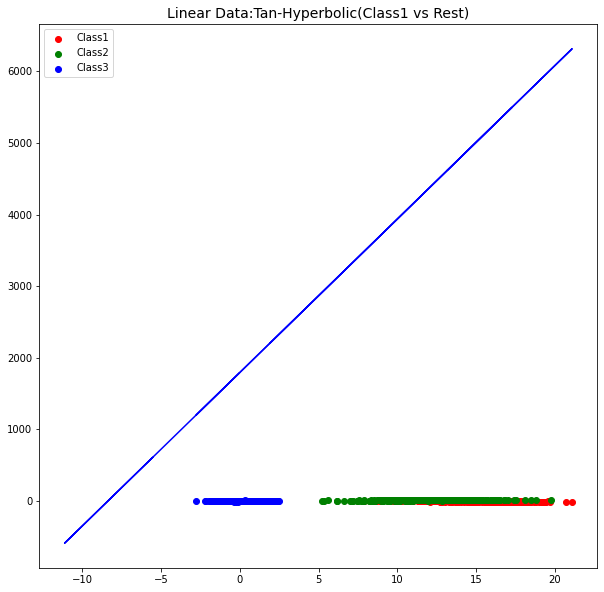

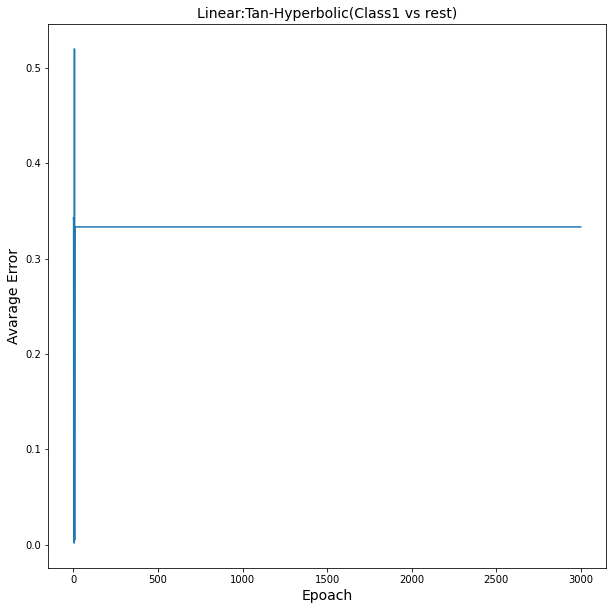

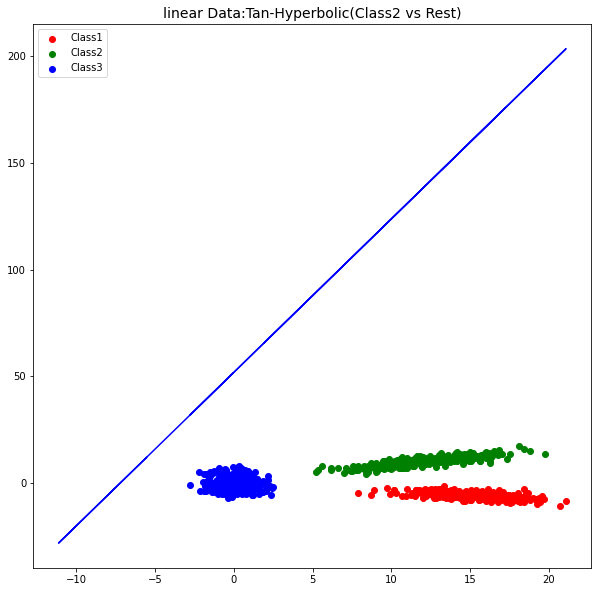

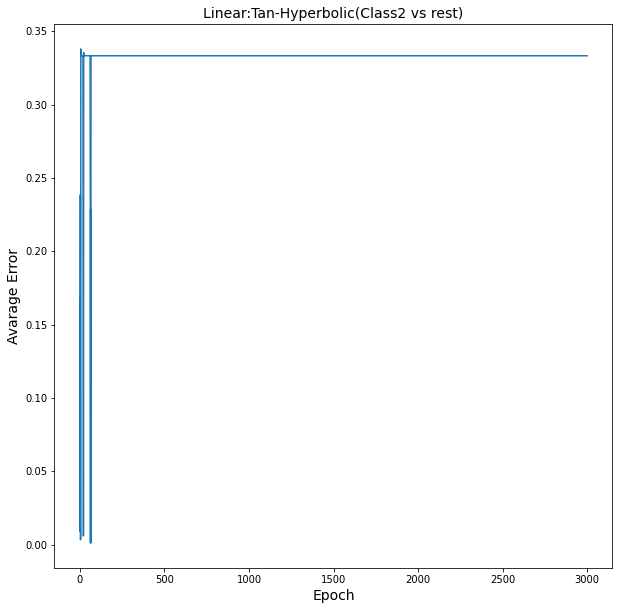

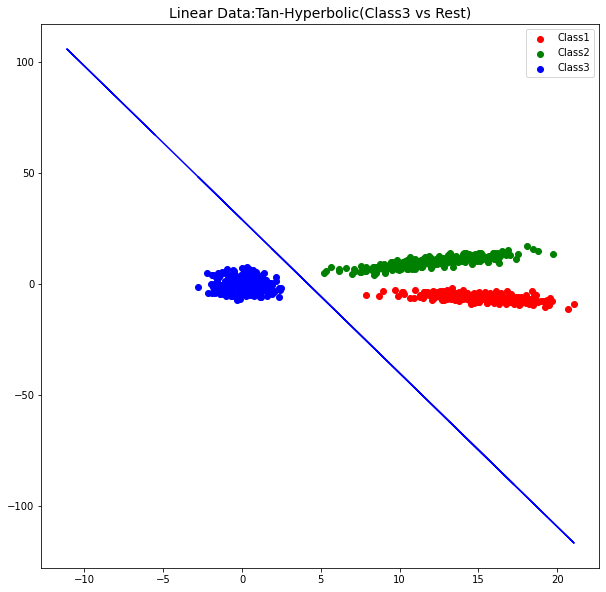

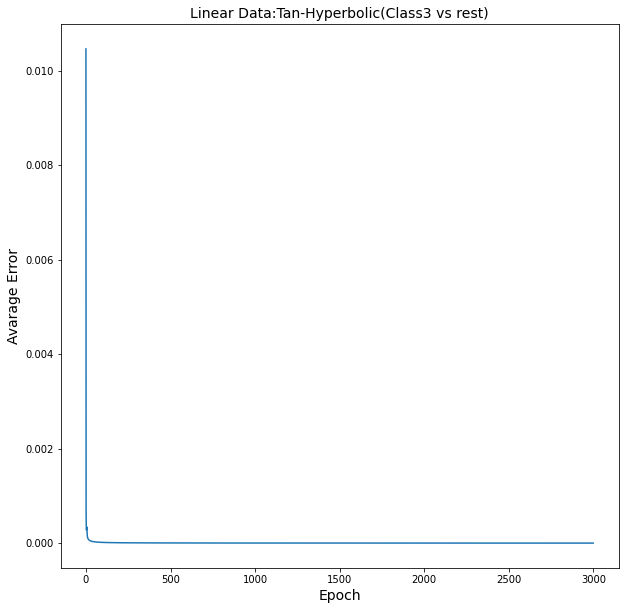


Linear - Tan-Hyperbolic:

     	Class1	Class2	Class3
Class1	200		0		0
Class2	200		0		0
Class3	0		0		200
Accuracy- Tan-Hyperbolic = 66.66666666666666%


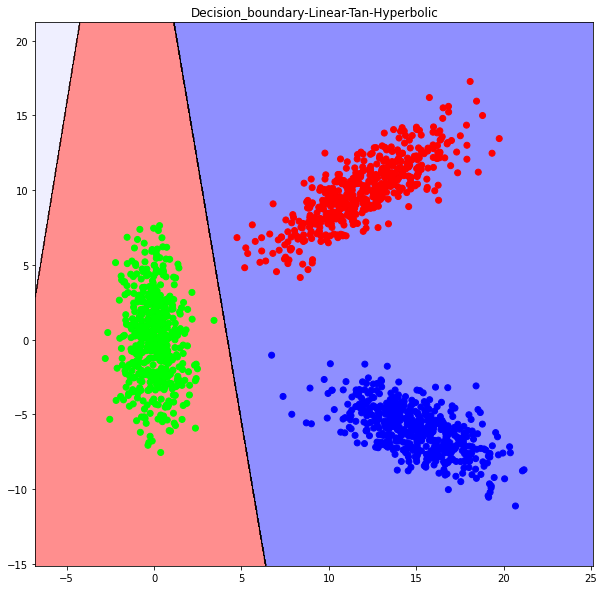


Non-Linear - Logistic:

     	Class1	Class2	Class3
Class1	200		0		0
Class2		30		166		4
Class3		26		0		174
Accuracy-Logistic = 90.0%


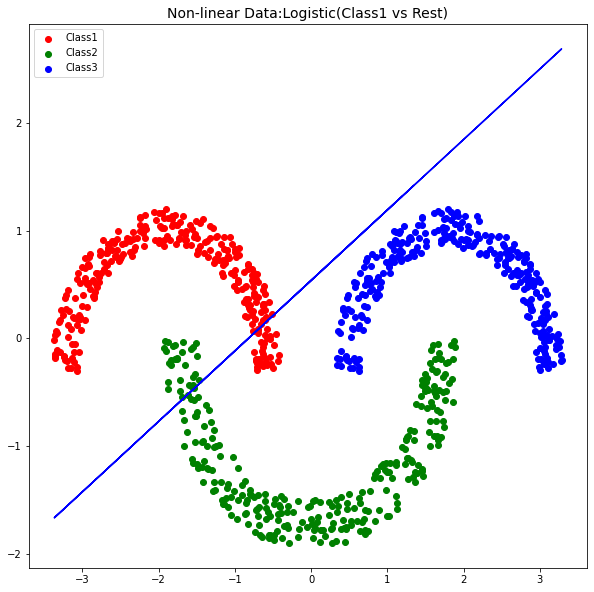

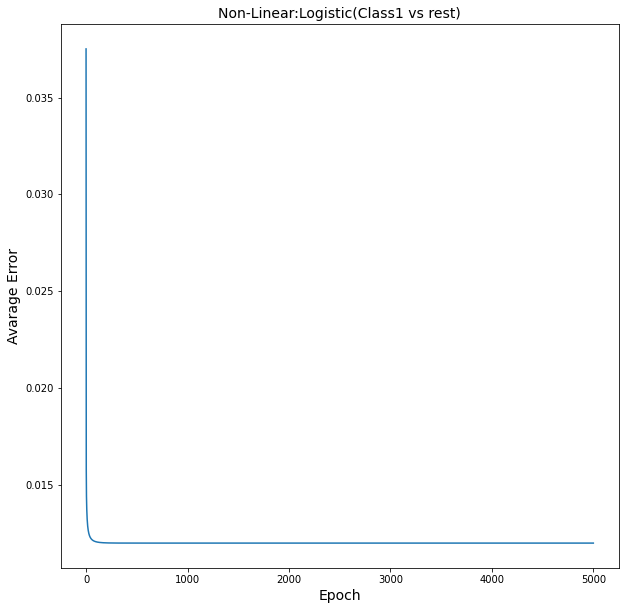

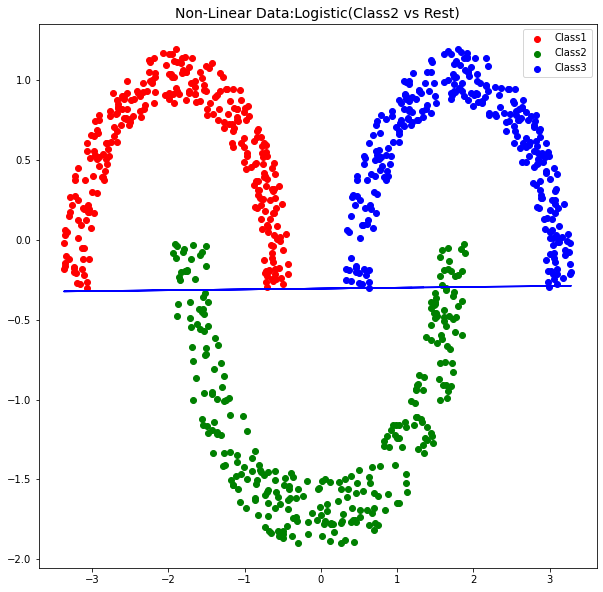

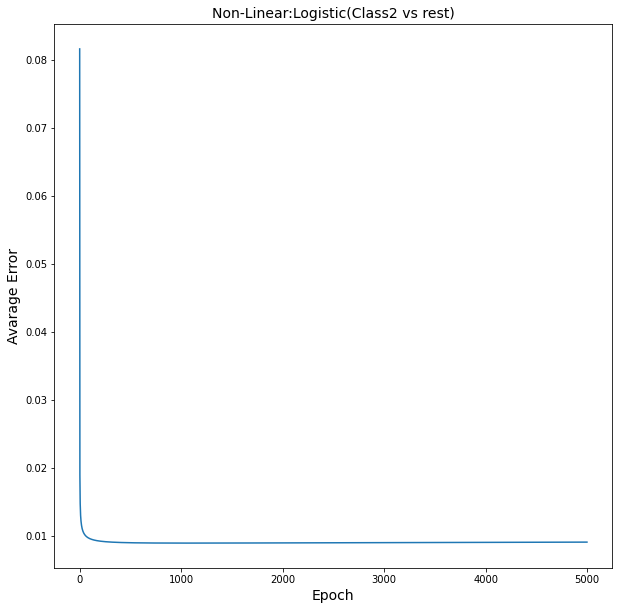

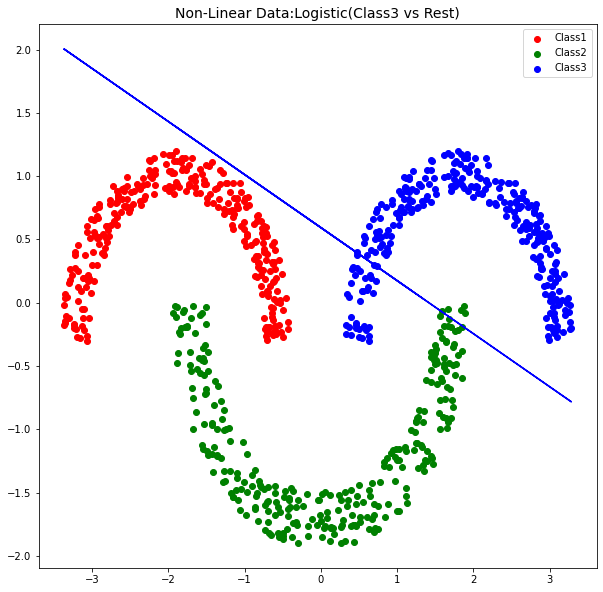

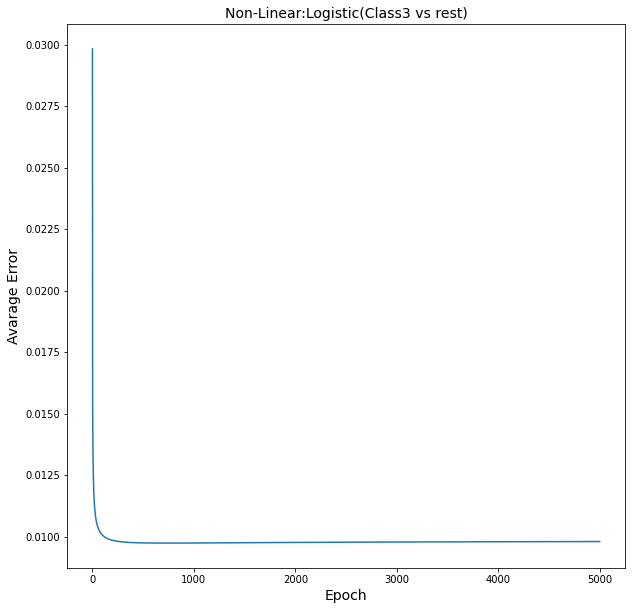

ValueError: ignored

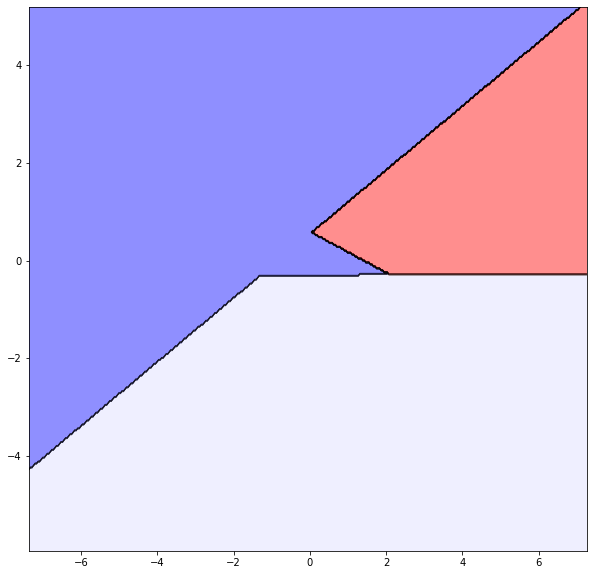

In [7]:

#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from Functions import datadivide,model
#from Functions import predict_logistic,predict_tan,plot_decision_boundry


#data_import
Class1_data = pd.read_csv(r"/content/drive/MyDrive/Assignment 1 Data/Classification/LS_Group32/Class1.txt",sep=" ",header=None).to_numpy()
Class2_data = pd.read_csv(r"/content/drive/MyDrive/Assignment 1 Data/Classification/LS_Group32/Class2.txt",sep=" ",header=None).to_numpy()
Class3_data = pd.read_csv(r"/content/drive/MyDrive/Assignment 1 Data/Classification/LS_Group32/Class3.txt",sep=" ",header=None).to_numpy()
Class4_data = pd.read_csv(r"/content/drive/MyDrive/Assignment 1 Data/Classification/NLS_Group32.txt",sep=" ",header=None).to_numpy()

#visualize data -linear
plt.figure(figsize=(10,10))
plt.scatter(Class1_data[:,0],Class1_data[:,1],color='red',label="Class1")
plt.scatter(Class2_data[:,0],Class2_data[:,1],color='green',label="Class2")
plt.scatter(Class3_data[:,0],Class3_data[:,1],color='blue',label="Class3")
plt.title("Linear Data",fontsize=20)
plt.legend()
plt.show()

#visulaize data - non linear
plt.figure(figsize=(10,10))
plt.scatter(Class4_data[:500,0],Class4_data[:500,1],label="Class1")
plt.scatter(Class4_data[500:1000,0],Class4_data[500:1000,1],label="Class2")
plt.scatter(Class4_data[1000:,0],Class4_data[1000:,1],label="Class3")
plt.title("Non-Linear Data",fontsize=20)
plt.legend()
plt.show()

#############################linear Data##############################################################
#add 1 to every element
one = np.ones((Class1_data.shape[0],1),dtype=int)
Class1 = np.append(one,Class1_data,axis=1)
Class2 = np.append(one,Class2_data,axis=1)
Class3 = np.append(one,Class3_data,axis=1)

# all datatogether
together_data =np.concatenate((Class1,Class2,Class3), axis=0)

#data divide in train and test
train1,test1 = datadivide(Class1)
train2,test2 = datadivide(Class2)
train3,test3 = datadivide(Class3)
epoch = 2000

###############logistic####################################
#model train
X1_weight,X2_weight,X3_weight,X1_Error,X2_Error,X3_Error = model(train1,train2,train3,epoch)

#test model
pred_1 = []
miss_pred_1_2= []
miss_pred_1_3= []
pred_2 = []
miss_pred_2_1= []
miss_pred_2_3= []
pred_3 = []
miss_pred_3_1= []
miss_pred_3_2= []


#train class 1 
for i in range(test1.shape[0]):
    x = predict_logistic(test1[i],X1_weight,X2_weight,X3_weight)
    if x == 0:
        pred_1.append(test1[i,1:])
    elif x== 1:
        miss_pred_1_2.append(test1[i,1:])
    else:
        miss_pred_1_3.append(test1[i,1:])

#train class 2 
for i in range(test2.shape[0]):
    x = predict_logistic(test2[i],X1_weight,X2_weight,X3_weight)
    if x == 1:
        pred_2.append(test2[i,1:])
    elif x==0:
        miss_pred_2_1.append(test2[i,1:])
    else:
        miss_pred_2_3.append(test2[i,1:])

#train class 3 
for i in range(test2.shape[0]):
    x = predict_logistic(test3[i],X1_weight,X2_weight,X3_weight)
    if x == 2:
        pred_3.append(test3[i,1:])
    elif x==0:
        miss_pred_3_1.append(test3[i,1:])
    else:
        miss_pred_3_2.append(test3[i,1:])
 
#converting into array        
pred_1 = np.array(pred_1)
miss_pred_1_2 = np.array(miss_pred_1_2)
miss_pred_1_3 = np.array(miss_pred_1_3)
pred_2 = np.array(pred_2)
miss_pred_2_1 = np.array(miss_pred_2_1)
miss_pred_2_3 = np.array(miss_pred_2_3)
pred_3 = np.array(pred_3)
miss_pred_3_1 = np.array(miss_pred_3_1)
miss_pred_3_2 = np.array(miss_pred_3_2)

#confusion matrix and accuracy
print("\nLinear - Logistic:\n")
print("     \tClass1\tClass2\tClass3")
print(f"Class1\t{pred_1.shape[0]}\t\t{miss_pred_1_2.shape[0]}\t\t{miss_pred_1_3.shape[0]}")
print(f"Class2\t{miss_pred_2_1.shape[0]}\t\t{pred_2.shape[0]}\t\t{miss_pred_2_3.shape[0]}")
print(f"Class3\t{miss_pred_3_1.shape[0]}\t\t{miss_pred_3_2.shape[0]}\t\t{pred_3.shape[0]}")
temp1 = pred_1.shape[0]+pred_2.shape[0]+pred_3.shape[0]
temp2 = test1.shape[0]+test2.shape[0]+test3.shape[0]
Accuracy = (temp1/temp2)*100
print(f"Accuracy-Logistic = {Accuracy}%")

#plot
train = np.concatenate((train1,train2,train3), axis=0)
intercept = -(X1_weight[0]/X1_weight[2])
theta = -(X1_weight[1]/X1_weight[2])
y_line = train*theta + intercept
plt.figure(figsize=(10,10))
plt.scatter(train1[:,1],train1[:,2], color='red',label = "Class1")
plt.scatter(train2[:,1], train2[:,2], color='green',label = "Class2")
plt.scatter(train3[:,1], train3[:,2], color='blue',label = "Class3")
plt.plot(train[:,1:],y_line[:,1:],color='blue',)
plt.title("Linear Data:Logistic(Class1 vs Rest)",fontsize=14)
plt.legend()
plt.show()

#plot Error
X = np.array([i for i in range(epoch)])
plt.figure(figsize=(10,10))
plt.plot(X,X1_Error)
plt.title("Linear:Logistic(Class1 vs rest)",fontsize=14)
plt.xlabel("Epoch",fontsize=14)
plt.ylabel("Avarage Error",fontsize=14)
plt.show()


#class2 vs rest
intercept = -(X2_weight[0]/X2_weight[2])
theta = -(X2_weight[1]/X2_weight[2])
y_line = train*theta + intercept
plt.figure(figsize=(10,10))
plt.scatter(train1[:,1],train1[:,2], color='red',label = "Class1")
plt.scatter(train2[:,1], train2[:,2], color='green',label = "Class2")
plt.scatter(train3[:,1], train3[:,2], color='blue',label = "Class2")
plt.plot(train[:,1:],y_line[:,1:],color='blue',)
plt.title("Linear Data:Logistic(Class2 vs Rest)",fontsize=14)
plt.legend()
plt.show()


#plot Error
plt.figure(figsize=(10,10))
plt.plot(X,X2_Error)
plt.title("Linear:Logistic(Class2 vs rest)",fontsize=14)
plt.xlabel("Epoch",fontsize=14)
plt.ylabel("Avarage Error",fontsize=14)
plt.show()

#class 3vs rsest
intercept = -(X3_weight[0]/X3_weight[2])
theta = -(X3_weight[1]/X3_weight[2])
y_line = train*theta + intercept
plt.figure(figsize=(10,10))
plt.scatter(train1[:,1],train1[:,2], color='red',label = "Class1")
plt.scatter(train2[:,1], train2[:,2], color='green',label = "Class2")
plt.scatter(train3[:,1], train3[:,2], color='blue',label = "Class2")
plt.plot(train[:,1:],y_line[:,1:],color='blue',)
plt.title("Linear Data:Logistic(Class3 vs Rest)",fontsize=14)
plt.legend()
plt.show()


#plot Error
X = np.array([i for i in range(epoch)])
plt.figure(figsize=(10,10))
plt.plot(X,X3_Error)
plt.title("Linear:Logistic(Class3 vs rest)",fontsize=14)
plt.xlabel("Epoch",fontsize=14)
plt.ylabel("Avarage Error",fontsize=14)
plt.show()

#labels
labels = np.zeros(1500)
labels[:500]=0
labels[500:1000]=1
labels[1000:]=2

plot_decision_boundry(together_data,labels,X1_weight,X2_weight,X3_weight,method="Linear-Logistic")

##################################Tan-Hyperbolic###########################
epoch = 3000
#tanhyperbolic
X1_weight,X2_weight,X3_weight,X1_Error,X2_Error,X3_Error = model(train1,train2,train3,epoch,method="Tan-Hyperbolic",)

#plot
train = np.concatenate((train1,train2,train3), axis=0)
intercept = -(X1_weight[0]/X1_weight[2])
theta = -(X1_weight[1]/X1_weight[2])
y_line = train*theta + intercept
plt.figure(figsize=(10,10))
plt.scatter(train1[:,1],train1[:,2], color='red',label = "Class1")
plt.scatter(train2[:,1], train2[:,2], color='green',label = "Class2")
plt.scatter(train3[:,1], train3[:,2], color='blue',label = "Class3")
plt.plot(train[:,1:],y_line[:,1:],color='blue',)
plt.title("Linear Data:Tan-Hyperbolic(Class1 vs Rest)",fontsize=14)
plt.legend()
plt.show()

#plot Error
X = np.array([i for i in range(epoch)])
plt.figure(figsize=(10,10))
plt.plot(X,X1_Error)
plt.title("Linear:Tan-Hyperbolic(Class1 vs rest)",fontsize=14)
plt.xlabel("Epoach",fontsize=14)
plt.ylabel("Avarage Error",fontsize=14)
plt.show()



intercept = -(X2_weight[0]/X2_weight[2])
theta = -(X2_weight[1]/X2_weight[2])
y_line = train*theta + intercept
plt.figure(figsize=(10,10))
plt.scatter(train1[:,1],train1[:,2], color='red',label = "Class1")
plt.scatter(train2[:,1], train2[:,2], color='green',label = "Class2")
plt.scatter(train3[:,1], train3[:,2], color='blue',label = "Class3")
plt.plot(train[:,1:],y_line[:,1:],color='blue',)
plt.title("linear Data:Tan-Hyperbolic(Class2 vs Rest)",fontsize=14)
plt.legend()
plt.show()

#plot Error
plt.figure(figsize=(10,10))
plt.plot(X,X2_Error)
plt.title("Linear:Tan-Hyperbolic(Class2 vs rest)",fontsize=14)
plt.xlabel("Epoch",fontsize=14)
plt.ylabel("Avarage Error",fontsize=14)
plt.show()


intercept = -(X3_weight[0]/X3_weight[2])
theta = -(X3_weight[1]/X3_weight[2])
y_line = train*theta + intercept
plt.figure(figsize=(10,10))
plt.scatter(train1[:,1],train1[:,2], color='red',label = "Class1")
plt.scatter(train2[:,1], train2[:,2], color='green',label = "Class2")
plt.scatter(train3[:,1], train3[:,2], color='blue',label = "Class3")
plt.plot(train[:,1:],y_line[:,1:],color='blue',)
plt.title("Linear Data:Tan-Hyperbolic(Class3 vs Rest)",fontsize=14)
plt.legend()
plt.show()


#plot Error
X = np.array([i for i in range(epoch)])
plt.figure(figsize=(10,10))
plt.plot(X,X3_Error)
plt.xlabel("Epoch",fontsize=14)
plt.ylabel("Avarage Error",fontsize=14)
plt.title("Linear Data:Tan-Hyperbolic(Class3 vs rest)",fontsize=14)
plt.show()

#test model
pred_1 = []
miss_pred_1_2= []
miss_pred_1_3= []
pred_2 = []
miss_pred_2_1= []
miss_pred_2_3= []
pred_3 = []
miss_pred_3_1= []
miss_pred_3_2= []


#train class 1 
for i in range(test1.shape[0]):
    x = predict_tan(test1[i],X1_weight,X2_weight,X3_weight)
    if x == 0:
        pred_1.append(test1[i,1:])
    elif x== 1:
        miss_pred_1_2.append(test1[i,1:])
    else:
        miss_pred_1_3.append(test1[i,1:])

#train class 2 
for i in range(test2.shape[0]):
    x = predict_tan(test2[i],X1_weight,X2_weight,X3_weight)
    if x == 1:
        pred_2.append(test2[i,1:])
    elif x==0:
        miss_pred_2_1.append(test2[i,1:])
    else:
        miss_pred_2_3.append(test2[i,1:])

#train class 13 
for i in range(test2.shape[0]):
    x = predict_tan(test3[i],X1_weight,X2_weight,X3_weight)
    if x == 2:
        pred_3.append(test3[i,1:])
    elif x==0:
        miss_pred_3_1.append(test3[i,1:])
    else:
        miss_pred_3_2.append(test3[i,1:])
 
#converting into array        
pred_1 = np.array(pred_1)
miss_pred_1_2 = np.array(miss_pred_1_2)
miss_pred_1_3 = np.array(miss_pred_1_3)
pred_2 = np.array(pred_2)
miss_pred_2_1 = np.array(miss_pred_2_1)
miss_pred_2_3 = np.array(miss_pred_2_3)
pred_3 = np.array(pred_3)
miss_pred_3_1 = np.array(miss_pred_3_1)
miss_pred_3_2 = np.array(miss_pred_3_2)

#confusion matrix and accuracy
print("\nLinear - Tan-Hyperbolic:\n")
print("     \tClass1\tClass2\tClass3")
print(f"Class1\t{pred_1.shape[0]}\t\t{miss_pred_1_2.shape[0]}\t\t{miss_pred_1_3.shape[0]}")
print(f"Class2\t{miss_pred_2_1.shape[0]}\t\t{pred_2.shape[0]}\t\t{miss_pred_2_3.shape[0]}")
print(f"Class3\t{miss_pred_3_1.shape[0]}\t\t{miss_pred_3_2.shape[0]}\t\t{pred_3.shape[0]}")
temp1 = pred_1.shape[0]+pred_2.shape[0]+pred_3.shape[0]
temp2 = test1.shape[0]+test2.shape[0]+test3.shape[0]
Accuracy = (temp1/temp2)*100
print(f"Accuracy- Tan-Hyperbolic = {Accuracy}%")

plot_decision_boundry(together_data,labels,X1_weight,X2_weight,X3_weight,method="Linear-Tan-Hyperbolic")

#####################################################Non-Linear############################################################
#non linear
Class4_1 = Class4_data[:500]
Class4_2 = Class4_data[500:1000]
Class4_3 = Class4_data[1000:]

#add 1 to every element
one = np.ones((Class4_1.shape[0],1),dtype=int)
one_3 = np.ones((Class4_3.shape[0],1),dtype=int)
Class1 = np.append(one,Class4_1,axis=1)
Class2 = np.append(one,Class4_2,axis=1)
Class3 = np.append(one_3,Class4_3,axis=1)

# all datatogether
together_data =np.concatenate((Class1,Class2,Class3), axis=0)

#data divide in train and test
train1,test1 = datadivide(Class1)
train2,test2 = datadivide(Class2)
train3,test3 = datadivide(Class3)

epoch=5000
#model train
X1_weight,X2_weight,X3_weight,X1_Error,X2_Error,X3_Error = model(train1,train2,train3,epoch)

#test model
#test model
pred_1 = []
miss_pred_1_2= []
miss_pred_1_3= []
pred_2 = []
miss_pred_2_1= []
miss_pred_2_3= []
pred_3 = []
miss_pred_3_1= []
miss_pred_3_2= []


#train class 1 
for i in range(test1.shape[0]):
    x = predict_logistic(test1[i],X1_weight,X2_weight,X3_weight)
    if x == 0:
        pred_1.append(test1[i,1:])
    elif x== 1:
        miss_pred_1_2.append(test1[i,1:])
    else:
        miss_pred_1_3.append(test1[i,1:])

#train class 2 
for i in range(test2.shape[0]):
    x = predict_logistic(test2[i],X1_weight,X2_weight,X3_weight)
    if x == 1:
        pred_2.append(test2[i,1:])
    elif x==0:
        miss_pred_2_1.append(test2[i,1:])
    else:
        miss_pred_2_3.append(test2[i,1:])

#train class 13 
for i in range(test2.shape[0]):
    x = predict_logistic(test3[i],X1_weight,X2_weight,X3_weight)
    if x == 2:
        pred_3.append(test3[i,1:])
    elif x==0:
        miss_pred_3_1.append(test3[i,1:])
    else:
        miss_pred_3_2.append(test3[i,1:])
 
#converting into array        
pred_1 = np.array(pred_1)
miss_pred_1_2 = np.array(miss_pred_1_2)
miss_pred_1_3 = np.array(miss_pred_1_3)
pred_2 = np.array(pred_2)
miss_pred_2_1 = np.array(miss_pred_2_1)
miss_pred_2_3 = np.array(miss_pred_2_3)
pred_3 = np.array(pred_3)
miss_pred_3_1 = np.array(miss_pred_3_1)
miss_pred_3_2 = np.array(miss_pred_3_2)

#confusion matrix and accuracy
print("\nNon-Linear - Logistic:\n")
print("     \tClass1\tClass2\tClass3")
print(f"Class1\t{pred_1.shape[0]}\t\t{miss_pred_1_2.shape[0]}\t\t{miss_pred_1_3.shape[0]}")
print(f"Class2\t\t{miss_pred_2_1.shape[0]}\t\t{pred_2.shape[0]}\t\t{miss_pred_2_3.shape[0]}")
print(f"Class3\t\t{miss_pred_3_1.shape[0]}\t\t{miss_pred_3_2.shape[0]}\t\t{pred_3.shape[0]}")
temp1 = pred_1.shape[0]+pred_2.shape[0]+pred_3.shape[0]
temp2 = test1.shape[0]+test2.shape[0]+test3.shape[0]
Accuracy = (temp1/temp2)*100
print(f"Accuracy-Logistic = {Accuracy}%")

#plot
train = np.concatenate((train1,train2,train3), axis=0)
intercept = -(X1_weight[0]/X1_weight[2])
theta = -(X1_weight[1]/X1_weight[2])
y_line = train*theta + intercept
plt.figure(figsize=(10,10))
plt.scatter(train1[:,1],train1[:,2], color='red',label = "Class1")
plt.scatter(train2[:,1], train2[:,2], color='green',label = "Class2")
plt.scatter(train3[:,1], train3[:,2], color='blue',label = "Class3")
plt.plot(train[:,1:],y_line[:,1:],color='blue',)
plt.title("Non-linear Data:Logistic(Class1 vs Rest)",fontsize=14)
plt.legend()
plt.show()

#plot Error
X = np.array([i for i in range(epoch)])
plt.figure(figsize=(10,10))
plt.plot(X,X1_Error)
plt.title("Non-Linear:Logistic(Class1 vs rest)",fontsize=14)
plt.xlabel("Epoch",fontsize=14)
plt.ylabel("Avarage Error",fontsize=14)
plt.show()



intercept = -(X2_weight[0]/X2_weight[2])
theta = -(X2_weight[1]/X2_weight[2])
y_line = train*theta + intercept
plt.figure(figsize=(10,10))
plt.scatter(train1[:,1],train1[:,2], color='red',label = "Class1")
plt.scatter(train2[:,1], train2[:,2], color='green',label = "Class2")
plt.scatter(train3[:,1], train3[:,2], color='blue',label = "Class3")
plt.plot(train[:,1:],y_line[:,1:],color='blue',)
plt.title("Non-Linear Data:Logistic(Class2 vs Rest)",fontsize=14)
plt.legend()
plt.show()


#plot Error
plt.figure(figsize=(10,10))
plt.plot(X,X2_Error)
plt.title("Non-Linear:Logistic(Class2 vs rest)",fontsize=14)
plt.xlabel("Epoch",fontsize=14)
plt.ylabel("Avarage Error",fontsize=14)
plt.show()


intercept = -(X3_weight[0]/X3_weight[2])
theta = -(X3_weight[1]/X3_weight[2])
y_line = train*theta + intercept
plt.figure(figsize=(10,10))
plt.scatter(train1[:,1],train1[:,2], color='red',label = "Class1")
plt.scatter(train2[:,1], train2[:,2], color='green',label = "Class2")
plt.scatter(train3[:,1], train3[:,2], color='blue',label = "Class3")
plt.plot(train[:,1:],y_line[:,1:],color='blue',)
plt.title("Non-Linear Data:Logistic(Class3 vs Rest)",fontsize=14)
plt.legend()
plt.show()


#plot Error
X = np.array([i for i in range(epoch)])
plt.figure(figsize=(10,10))
plt.plot(X,X3_Error)
plt.title("Non-Linear:Logistic(Class3 vs rest)",fontsize=14)
plt.xlabel("Epoch",fontsize=14)
plt.ylabel("Avarage Error",fontsize=14)
plt.show()

#labels
labels = np.zeros(2000)
labels[:500]=0
labels[500:1000]=1
labels[1000:]=2

plot_decision_boundry(together_data,labels,X1_weight,X2_weight,X3_weight,method="Non-Linear Logistic")

epoch = 5000
#tanhyperbolic
X1_weight,X2_weight,X3_weight,X1_Error,X2_Error,X3_Error = model(train1,train2,train3,epoch,method="Tan-Hyperbolic")

#plot
train = np.concatenate((train1,train2,train3), axis=0)
intercept = -(X1_weight[0]/X1_weight[2])
theta = -(X1_weight[1]/X1_weight[2])
y_line = train*theta + intercept
plt.figure(figsize=(10,10))
plt.scatter(train1[:,1],train1[:,2], color='red',label = "Class1")
plt.scatter(train2[:,1], train2[:,2], color='green',label = "Class2")
plt.scatter(train3[:,1], train3[:,2], color='blue',label = "Class3")
plt.plot(train[:,1:],y_line[:,1:],color='blue',)
plt.title("Non-linear Data:Tan-Hyperbolic(Class1 vs Rest)",fontsize=14)
plt.legend()
plt.show()

#plot Error
X = np.array([i for i in range(epoch)])
plt.figure(figsize=(10,10))
plt.plot(X,X1_Error)
plt.title("Non-Linear:Tan-Hyperbolic(Class1 vs rest)",fontsize=14)
plt.xlabel("Epoch",fontsize=14)
plt.ylabel("Avarage Error",fontsize=14)
plt.show()



intercept = -(X2_weight[0]/X2_weight[2])
theta = -(X2_weight[1]/X2_weight[2])
y_line = train*theta + intercept
plt.figure(figsize=(10,10))
plt.scatter(train1[:,1],train1[:,2], color='red',label = "Class1")
plt.scatter(train2[:,1], train2[:,2], color='green',label = "Class2")
plt.scatter(train3[:,1], train3[:,2], color='blue',label = "Class3")
plt.plot(train[:,1:],y_line[:,1:],color='blue',)
plt.title("Non-linear Data:Tan-Hyperbolic(Class2 vs Rest)",fontsize=14)
plt.legend()
plt.show()

#plot Error
plt.figure(figsize=(10,10))
plt.plot(X,X2_Error)
plt.title("Non-Linear:Tan-Hyperbolic(Class2 vs rest)",fontsize=14)
plt.xlabel("Epoch",fontsize=14)
plt.ylabel("Avarage Error",fontsize=14)
plt.show()


intercept = -(X3_weight[0]/X3_weight[2])
theta = -(X3_weight[1]/X3_weight[2])
y_line = train*theta + intercept
plt.figure(figsize=(10,10))
plt.scatter(train1[:,1],train1[:,2], color='red',label = "Class1")
plt.scatter(train2[:,1], train2[:,2], color='green',label = "Class2")
plt.scatter(train3[:,1], train3[:,2], color='blue',label = "Class3")
plt.plot(train[:,1:],y_line[:,1:],color='blue',)
plt.title("Non-Linear Data:Tan-Hyperbolic(Class3 vs Rest)",fontsize=14)
plt.legend()
plt.show()


#plot Error
X = np.array([i for i in range(epoch)])
plt.figure(figsize=(10,10))
plt.plot(X,X3_Error)
plt.xlabel("Epoch",fontsize=14)
plt.ylabel("Avarage Error",fontsize=14)
plt.title("Non-Linear Data:Tan-Hyperbolic(Class3 vs Rest)",fontsize=14)
plt.show()

#test model
pred_1 = []
miss_pred_1_2= []
miss_pred_1_3= []
pred_2 = []
miss_pred_2_1= []
miss_pred_2_3= []
pred_3 = []
miss_pred_3_1= []
miss_pred_3_2= []


#train class 1 
for i in range(test1.shape[0]):
    x = predict_tan(test1[i],X1_weight,X2_weight,X3_weight)
    if x == 0:
        pred_1.append(test1[i,1:])
    elif x== 1:
        miss_pred_1_2.append(test1[i,1:])
    else:
        miss_pred_1_3.append(test1[i,1:])

#train class 2 
for i in range(test2.shape[0]):
    x = predict_tan(test2[i],X1_weight,X2_weight,X3_weight)
    if x == 1:
        pred_2.append(test2[i,1:])
    elif x==0:
        miss_pred_2_1.append(test2[i,1:])
    else:
        miss_pred_2_3.append(test2[i,1:])

#train class 13 
for i in range(test2.shape[0]):
    x = predict_tan(test3[i],X1_weight,X2_weight,X3_weight)
    if x == 2:
        pred_3.append(test3[i,1:])
    elif x==0:
        miss_pred_3_1.append(test3[i,1:])
    else:
        miss_pred_3_2.append(test3[i,1:])
 
#converting into array        
pred_1 = np.array(pred_1)
miss_pred_1_2 = np.array(miss_pred_1_2)
miss_pred_1_3 = np.array(miss_pred_1_3)
pred_2 = np.array(pred_2)
miss_pred_2_1 = np.array(miss_pred_2_1)
miss_pred_2_3 = np.array(miss_pred_2_3)
pred_3 = np.array(pred_3)
miss_pred_3_1 = np.array(miss_pred_3_1)
miss_pred_3_2 = np.array(miss_pred_3_2)

#confusion matrix and accuracy
print("\nNon-Linear - Tan-Hyperbolic")
print("     \tClass1\tClass2\tClass3")
print(f"Class1\t{pred_1.shape[0]}\t\t{miss_pred_1_2.shape[0]}\t\t{miss_pred_1_3.shape[0]}")
print(f"Class2\t{miss_pred_2_1.shape[0]}\t\t{pred_2.shape[0]}\t\t{miss_pred_2_3.shape[0]}")
print(f"Class3\t{miss_pred_3_1.shape[0]}\t\t{miss_pred_3_2.shape[0]}\t\t{pred_3.shape[0]}")
temp1 = pred_1.shape[0]+pred_2.shape[0]+pred_3.shape[0]
temp2 = test1.shape[0]+test2.shape[0]+test3.shape[0]
Accuracy = (temp1/temp2)*100
print(f"Accuracy = {Accuracy}%")


plot_decision_boundry(together_data,labels,X1_weight,X2_weight,X3_weight,method="NonLinear-Tan-Hyperbolic")

